# Analisis Data Pengguna Sepeda

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh jam dalam sehari terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan jumlah penyewaan sepeda berdasarkan jenis cuaca (cuaca cerah, mendung, hujan, dsb)?
- Apakah ada tren penggunaan sepeda yang berbeda antara pengguna musiman(casual) dan pengguna harian(registered)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

getering data day

In [2]:
import pandas as pd

day = 'data/day.csv'
days = pd.read_csv(day)

print(days.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


getering data hour

In [3]:
hours = 'data/hour.csv'
hour = pd.read_csv(hours)

print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- xxx
- xxx

### Assessing Data

assessing data daays

In [4]:

# Membaca file CSV
file_path = 'data/day.csv'
days = pd.read_csv(file_path)

# General Information about the dataset
print("1. Informasi Umum Dataset:")
days.info()

# Statistical Summary of numerical columns
print("\n2. Ringkasan Statistik Kolom Numerik:")
print(days.describe())

# Checking for missing values
print("\n3. Pemeriksaan Missing Values:")
print(days.isnull().sum())

# Checking for duplicates
print("\n4. Pemeriksaan Baris Duplikat:")
print(f"Jumlah Baris Duplikat: {days.duplicated().sum()}")

# Checking for unique values in each column
print("\n5. Jumlah Nilai Unik per Kolom:")
print(days.nunique())


1. Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

2. Ringkasan Statistik Kolom Numerik:
          instant      seas

**Insight:**
- xxx
- xxx

### Cleaning Data

membersihkan tabel days

In [5]:
days.duplicated().sum()

0

In [6]:
days.drop_duplicates(inplace=True)

In [7]:
print("Jumlah duplikasi: ", days.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#mengganti weathersit dari int menjadi object, hal ini dilakukan agar data yang ditampilkan lebih jelas
weather_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan/Salju',
    4: 'cuaca buruk'
}
days['weathersit'] = days['weathersit'].replace(weather_mapping)
print(days[['weathersit', 'cnt']].head())

  weathersit   cnt
0    Berawan   985
1    Berawan   801
2      Cerah  1349
3      Cerah  1562
4      Cerah  1600


In [10]:
#mengubah type dtday dari object ke date
print(days['dteday'].head())
days['dteday'] = pd.to_datetime(days['dteday'])
print(hour['dteday'].head())

0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object
0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object


In [11]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
days.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


membersihkan tabel hour

In [13]:

# Membaca file CSV
file_path = 'data/hour.csv'
hour = pd.read_csv(file_path)

# General Information about the dataset
print("1. Informasi Umum Dataset:")
hour.info()

# Statistical Summary of numerical columns
print("\n2. Ringkasan Statistik Kolom Numerik:")
print(hour.describe())

# Checking for missing values
print("\n3. Pemeriksaan Missing Values:")
print(hour.isnull().sum())

# Checking for duplicates
print("\n4. Pemeriksaan Baris Duplikat:")
print(f"Jumlah Baris Duplikat: {hour.duplicated().sum()}")

# Checking for unique values in each column
print("\n5. Jumlah Nilai Unik per Kolom:")
print(hour.nunique())


1. Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

2. Ringkasan Statisti

In [14]:
hour.duplicated().sum()

0

In [15]:
hour.drop_duplicates(inplace=True)

In [16]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


missing_value

In [17]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


incurreate_value

In [19]:
#mengganti weathersit dari int menjadi object, hal ini dilakukan agar data yang ditampilkan lebih jelas
weather_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan/Salju',
    4: 'cuaca buruk'
}
hour['weathersit'] = hour['weathersit'].replace(weather_mapping)
print(hour[['weathersit', 'cnt']].head())

  weathersit  cnt
0      Cerah   16
1      Cerah   40
2      Cerah   32
3      Cerah   13
4      Cerah    1


In [20]:
#mengubah type dtday dari object ke date
print(hour['dteday'].head())
hour['dteday'] = pd.to_datetime(hour['dteday'])
print(hour['dteday'].head())

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object
0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]


In [21]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Explore ...

explore_data_days

In [23]:
days.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
276,277,2011-10-04,4,0,10,0,2,1,Cerah,0.484167,0.472858,0.710000,0.205854,486,3970,4456
67,68,2011-03-09,1,0,3,0,3,1,Berawan,0.295833,0.286608,0.775417,0.220150,191,1700,1891
471,472,2012-04-16,2,1,4,1,1,0,Cerah,0.664167,0.614925,0.561667,0.284829,1198,5172,6370
581,582,2012-08-04,3,1,8,0,6,0,Cerah,0.793333,0.751267,0.613333,0.257458,2345,4479,6824
554,555,2012-07-08,3,1,7,0,0,0,Cerah,0.822500,0.790396,0.573750,0.125629,1203,3469,4672


In [24]:
days.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
days.instant.is_unique

True

In [26]:
days.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

<Axes: >

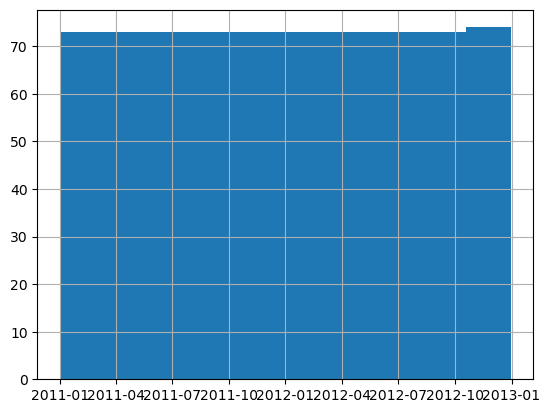

In [27]:
days.dteday.hist()

explore_data_hour

In [28]:
hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15828,15829,2012-10-26,4,1,10,17,0,5,1,Berawan,0.56,0.5303,0.76,0.1940,125,692,817
7017,7018,2011-10-25,4,0,10,0,0,2,1,Cerah,0.44,0.4394,0.77,0.1343,4,26,30
1890,1891,2011-03-24,2,0,3,13,0,4,1,Berawan,0.32,0.3030,0.70,0.2239,11,90,101
14936,14937,2012-09-19,3,1,9,13,0,3,1,Cerah,0.60,0.6212,0.40,0.2537,55,234,289
4228,4229,2011-06-30,3,0,6,2,0,4,1,Cerah,0.62,0.6212,0.57,0.1343,2,6,8


In [29]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [30]:
hour.instant.is_unique

True

In [31]:
hour.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

<Axes: >

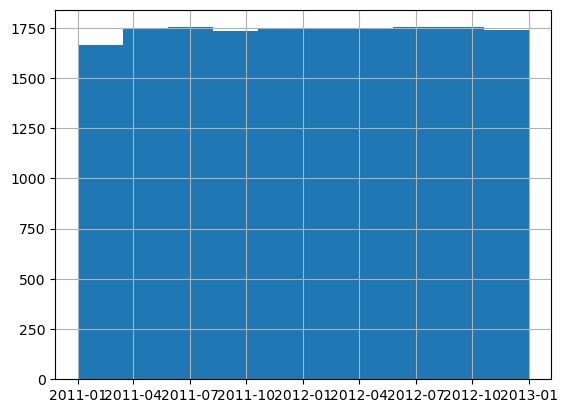

In [32]:
hour.dteday.hist()

**Insight:**
- xxx
- xxx

Explore data day & hour

In [33]:
merged_df = pd.merge(hour, days[['dteday', 'weathersit']], on='dteday', how='inner')

In [34]:
print(merged_df.head())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

  weathersit_x  temp   atemp   hum  windspeed  casual  registered  cnt  \
0        Cerah  0.24  0.2879  0.81        0.0       3          13   16   
1        Cerah  0.22  0.2727  0.80        0.0       8          32   40   
2        Cerah  0.22  0.2727  0.80        0.0       5          27   32   
3        Cerah  0.24  0.2879  0.75        0.0       3          10   13   
4        Cerah  0.24  0.2879  0.75        0.0       0           1    1   

  weathersit_y  
0      Berawan  
1      Berawan  
2      Berawan  
3      Berawan  
4      

In [35]:
# Menghapus kolom yang tidak diperlukan
merged_df.drop(columns=['weathersit_y'], inplace=True)

In [36]:
# Mengganti kode cuaca dengan deskripsi
weather_conditions = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan'
}

merged_df['weathersit_x'] = merged_df['weathersit_x'].replace(weather_conditions)

In [37]:
# Menghitung total penyewa berdasarkan kondisi cuaca serta mengurutkan data terkecil ke terbesar agar mudah dibaca
weather_agg = merged_df.groupby('weathersit_x')['cnt'].sum().reset_index()
weather_agg.columns = ['Kondisi Cuaca', 'Total Penyewa']
weather_agg_sorted = weather_agg.sort_values(by='Total Penyewa', ascending=True)

print(weather_agg_sorted)

  Kondisi Cuaca  Total Penyewa
3   cuaca buruk            223
2   Hujan/Salju         158331
0       Berawan         795952
1         Cerah        2338173


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh jam dalam sehari terhadap jumlah penyewaan sepeda?

In [38]:
merged_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit_x,temp,atemp,hum,windspeed,casual,registered,cnt
14059,14060,2012-08-14,3,1,8,0,0,2,1,Cerah,0.70,0.6667,0.74,0.2239,12,48,60
8443,8444,2011-12-23,1,0,12,11,0,5,1,Cerah,0.40,0.4091,0.58,0.4478,26,148,174
3477,3478,2011-05-29,2,0,5,19,0,0,0,Cerah,0.72,0.6970,0.74,0.2537,141,146,287
10255,10256,2012-03-08,1,1,3,9,0,4,1,Cerah,0.46,0.4545,0.72,0.4627,19,282,301
10665,10666,2012-03-25,2,1,3,12,0,0,0,Berawan,0.40,0.4091,0.94,0.2239,122,238,360


In [39]:
hourly_rental = hour.groupby('hr')['cnt'].sum().reset_index()

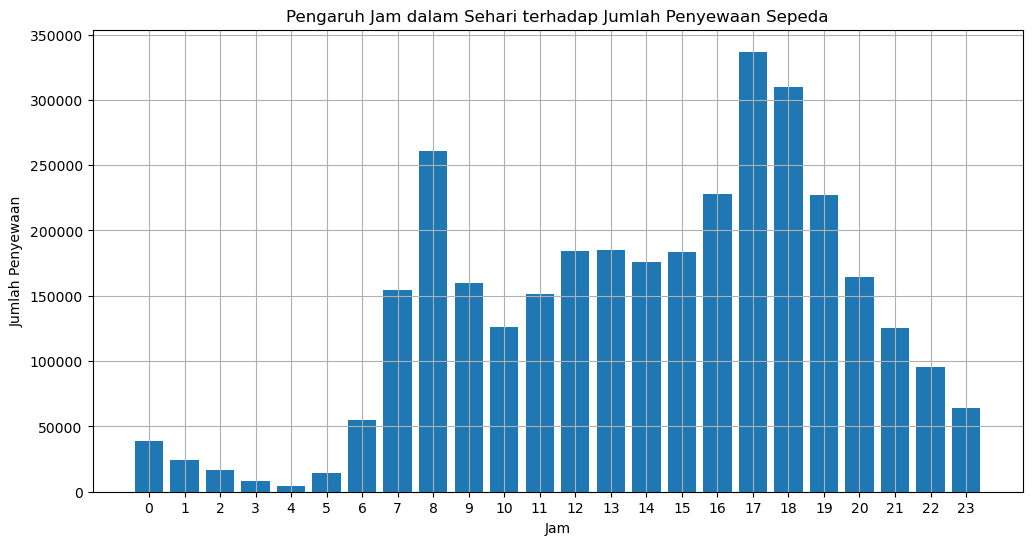

In [40]:
import matplotlib.pyplot as plt

# Agregasi data berdasarkan jam
hourly_rental = hour.groupby('hr')['cnt'].sum().reset_index()

# Membuat grafik
plt.figure(figsize=(12, 6))
plt.bar(hourly_rental['hr'], hourly_rental['cnt'])
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pengaruh Jam dalam Sehari terhadap Jumlah Penyewaan Sepeda')
plt.xticks(range(24))  # Menampilkan label untuk setiap jam
plt.grid(True)  # Menambahkan grid untuk visualisasi yang lebih baik
plt.show()

### Pertanyaan 2: Apakah ada perbedaan jumlah penyewaan sepeda berdasarkan jenis cuaca (cuaca cerah, mendung, hujan, dsb)?

In [41]:
weather_rental = hour.groupby('weathersit')['cnt'].sum().reset_index()

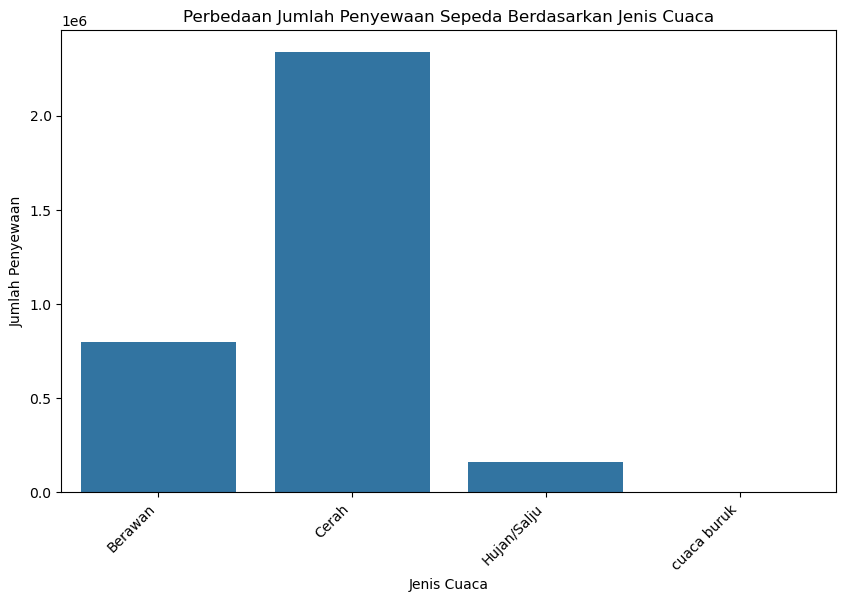

In [42]:
# Agregasi data berdasarkan jenis cuaca
weather_rental = hour.groupby('weathersit')['cnt'].sum().reset_index()

# Membuat grafik batang dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_rental)
plt.xlabel('Jenis Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.title('Perbedaan Jumlah Penyewaan Sepeda Berdasarkan Jenis Cuaca')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 3: Apakah ada tren penggunaan sepeda yang berbeda antara pengguna musiman(casual) dan pengguna harian(registered)?

In [43]:
user_type_rental = hour.groupby(['dteday', 'casual', 'registered'])['cnt'].sum().reset_index()

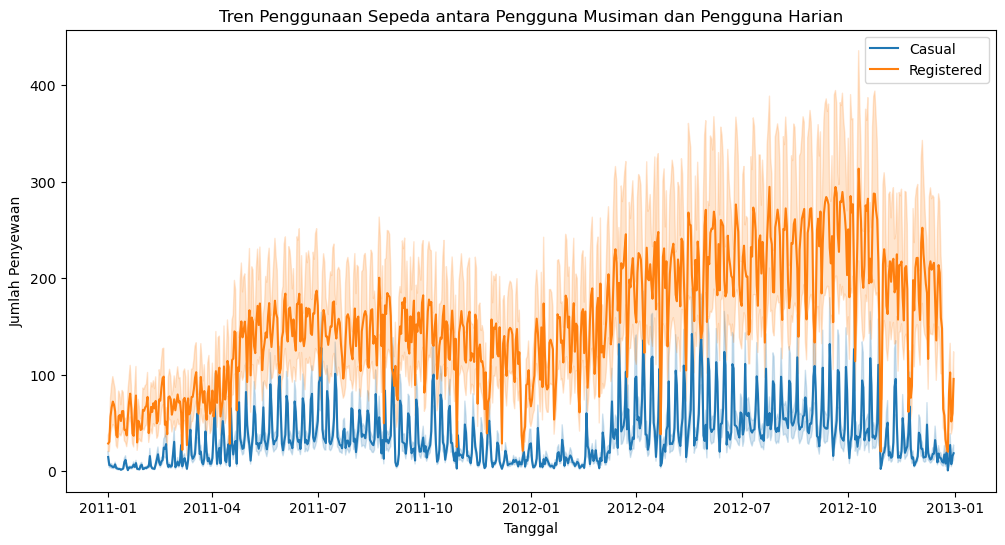

In [44]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='casual', data=user_type_rental, label='Casual')
sns.lineplot(x='dteday', y='registered', data=user_type_rental, label='Registered')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penggunaan Sepeda antara Pengguna Musiman dan Pengguna Harian')
plt.legend()
plt.show()

## Analisis Lanjutan (Opsional)

In [45]:
merged_df.to_csv("all_data.csv", index=False)


## Conclusion

- Conclution pertanyaan  : the number of bicycle renters is highest from 17.00 to 18.00

- Conclution pertanyaan 2 : the number of bicycle renters is highest based on the type of weather when the weather is sunny

- conclution pertanyaan 3 :  the highest number of bicycle renters between seasonal visitors and daily users are daily users